In [1]:
#importing modules

import numpy as np
import cv2

import matplotlib
from matplotlib import pyplot as plt

%matplotlib inline

ImportError: dlopen(/opt/homebrew/lib/python3.9/site-packages/cv2/cv2.cpython-39-darwin.so, 0x0002): Library not loaded: /opt/homebrew/opt/tesseract/lib/libtesseract.4.dylib
  Referenced from: <E405C4FE-39F4-3A94-AE99-384CA8D22D7C> /opt/homebrew/lib/python3.9/site-packages/cv2/cv2.cpython-39-darwin.so
  Reason: tried: '/opt/homebrew/opt/tesseract/lib/libtesseract.4.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/opt/homebrew/opt/tesseract/lib/libtesseract.4.dylib' (no such file), '/opt/homebrew/opt/tesseract/lib/libtesseract.4.dylib' (no such file), '/usr/local/lib/libtesseract.4.dylib' (no such file), '/usr/lib/libtesseract.4.dylib' (no such file, not in dyld cache)

/Users/joshmachado/miniforge3/bin/pip


In [8]:
#reading an image

img = cv2.imread("C:\\Users\\saudq\\OneDrive\\Desktop\\Image Classifier\\dataset\\valtteri_bottas\\vb (1).png")
img.shape

(256, 256, 3)

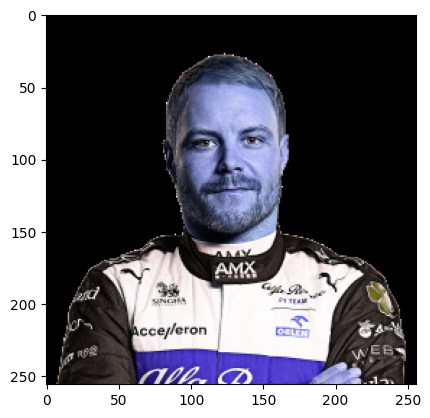

In [9]:
#show image

plt.imshow(img)

In [10]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(256, 256)

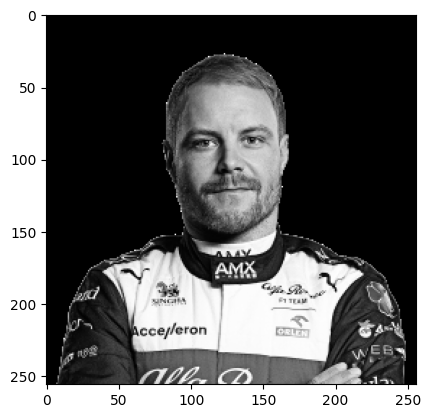

In [11]:
plt.imshow(gray,cmap='gray')

In [12]:
#face and eye cascades

face_cascade = cv2.CascadeClassifier("C:\\Users\\saudq\\OneDrive\\Desktop\\Image Classifier\\opencv\\haarcascades\\haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("C:\\Users\\saudq\\OneDrive\\Desktop\\Image Classifier\\opencv\\haarcascades\\haarcascade_eye.xml")

faces = face_cascade.detectMultiScale(gray,1.3,5)
faces

array([[84, 50, 92, 92]])

In [13]:
(x,y,w,h) = faces[0]
x,y,w,h

(84, 50, 92, 92)

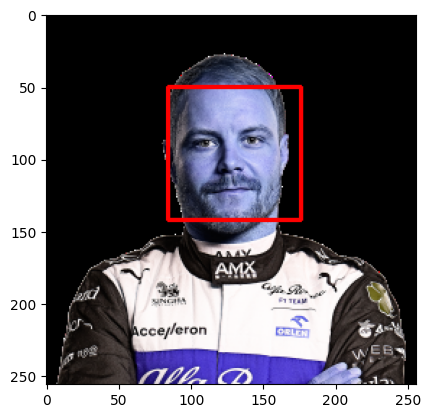

In [14]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

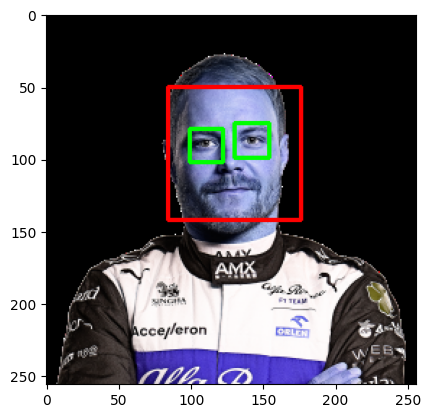

In [15]:
#detecting face and eyes


for(x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for(ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        
plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

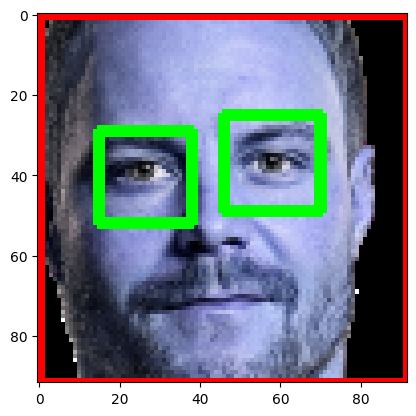

In [16]:
#cropping the facce region


%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [17]:
#function to detect face and eyes and return cropped face

def get_cropped_image(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.5,3)
    
    for(x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >=2:
            return roi_color

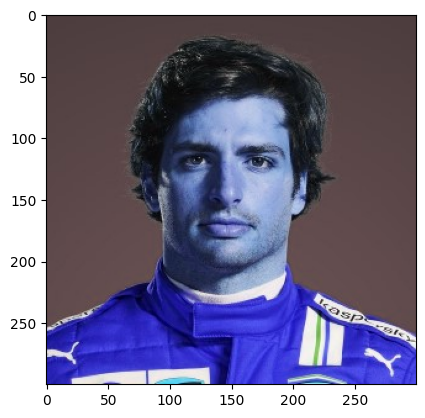

In [18]:
#original image

original_image = cv2.imread("C:\\Users\\saudq\\OneDrive\\Desktop\\Image Classifier\\dataset\\carlos_sainz\\cs (8).jpeg")
plt.imshow(original_image)

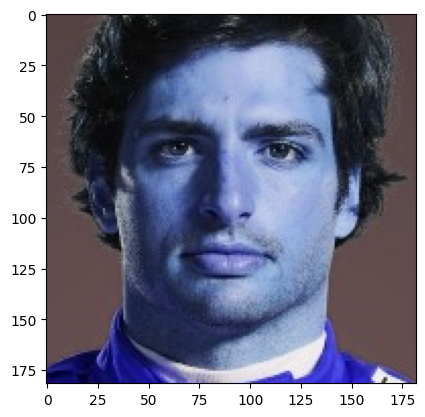

In [21]:
#testing the function

cropped_image = get_cropped_image("C:\\Users\\saudq\\OneDrive\\Desktop\\Image Classifier\\dataset\\carlos_sainz\\cs (8).jpeg")

plt.imshow(cropped_image)

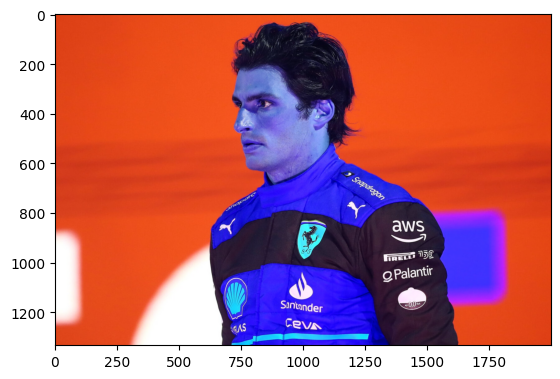

In [22]:
org_obs_image = cv2.imread("C:\\Users\\saudq\\OneDrive\\Desktop\\Image Classifier\\dataset\\carlos_sainz\\cs (82).jpeg")


plt.imshow(org_obs_image)

In [23]:
obs_image = get_cropped_image("C:\\Users\\saudq\\OneDrive\\Desktop\\Image Classifier\\dataset\\carlos_sainz\\cs (82).jpeg")

obs_image

In [24]:
#generate a folder to store cropped images

path_to_data = './dataset/'
path_to_cr_data = './dataset/cropped/'

In [25]:
#storing paths of subfolders in python list

import os

img_dirs = []

for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [26]:
img_dirs

['./dataset/carlos_sainz',
 './dataset/charles_leclerc',
 './dataset/daniel_ricciardo',
 './dataset/fernando_alonso',
 './dataset/george_russell',
 './dataset/lewis_hamilton',
 './dataset/max_verstappen',
 './dataset/sebastian_vettel',
 './dataset/sergio_perez',
 './dataset/valtteri_bottas']

In [44]:
#create cropped folder if it doesnt exist

import shutil

if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
    
os.mkdir(path_to_cr_data)

In [45]:
#iterate through img dirs

cropped_image_dirs = []
file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    name = img_dir.split('/')[-1]
    print(name)
    
    file_names_dict[name] = []
    
    #iterate through each immage in a dir
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image(entry.path)
        
        if roi_color is not None:
            cropped_folder = path_to_cr_data + name
            
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                
                cropped_image_dirs.append(cropped_folder)
                
                print("Generating cropped images in folder: ", cropped_folder)
                
            
            cropped_file_name = name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            
            cv2.imwrite(cropped_file_path,roi_color)
            file_names_dict[name].append(cropped_file_path)
            count += 1
            
print("Done")

carlos_sainz
Generating cropped images in folder:  ./dataset/cropped/carlos_sainz
charles_leclerc
Generating cropped images in folder:  ./dataset/cropped/charles_leclerc
daniel_ricciardo
Generating cropped images in folder:  ./dataset/cropped/daniel_ricciardo
fernando_alonso
Generating cropped images in folder:  ./dataset/cropped/fernando_alonso
george_russell
Generating cropped images in folder:  ./dataset/cropped/george_russell
lewis_hamilton
Generating cropped images in folder:  ./dataset/cropped/lewis_hamilton
max_verstappen
Generating cropped images in folder:  ./dataset/cropped/max_verstappen
sebastian_vettel
Generating cropped images in folder:  ./dataset/cropped/sebastian_vettel
sergio_perez
Generating cropped images in folder:  ./dataset/cropped/sergio_perez
valtteri_bottas
Generating cropped images in folder:  ./dataset/cropped/valtteri_bottas
Done


In [46]:
file_names_dict = {}

for img_dir in cropped_image_dirs:
    driver_name = img_dir.split('/')[-1]
    
    file_list = []
    
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
        
    file_names_dict[driver_name] = file_list
    
file_names_dict

{'carlos_sainz': ['./dataset/cropped/carlos_sainz\\carlos_sainz1.png',
  './dataset/cropped/carlos_sainz\\carlos_sainz10.png',
  './dataset/cropped/carlos_sainz\\carlos_sainz100.png',
  './dataset/cropped/carlos_sainz\\carlos_sainz101.png',
  './dataset/cropped/carlos_sainz\\carlos_sainz102.png',
  './dataset/cropped/carlos_sainz\\carlos_sainz104.png',
  './dataset/cropped/carlos_sainz\\carlos_sainz105.png',
  './dataset/cropped/carlos_sainz\\carlos_sainz106.png',
  './dataset/cropped/carlos_sainz\\carlos_sainz107.png',
  './dataset/cropped/carlos_sainz\\carlos_sainz108.png',
  './dataset/cropped/carlos_sainz\\carlos_sainz109.png',
  './dataset/cropped/carlos_sainz\\carlos_sainz11.png',
  './dataset/cropped/carlos_sainz\\carlos_sainz110.png',
  './dataset/cropped/carlos_sainz\\carlos_sainz111.png',
  './dataset/cropped/carlos_sainz\\carlos_sainz112.png',
  './dataset/cropped/carlos_sainz\\carlos_sainz113.png',
  './dataset/cropped/carlos_sainz\\carlos_sainz114.png',
  './dataset/croppe

In [48]:
#wavelet transformation on images to extract features

import numpy as np
import pywt
import cv2

def w2d(img, mode='haar', level=1):
    imArray = img
    
    #convert img to grayscale
    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
    
    #convert to float
    imArray = np.float32(imArray)
    imArray /= 255
    
    #compute coefficients
    coeffs = pywt.wavedec2(imArray, mode, level = level)
    
    #process coefficient
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0;
    
    #reconstruction
    imArray_H = pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H

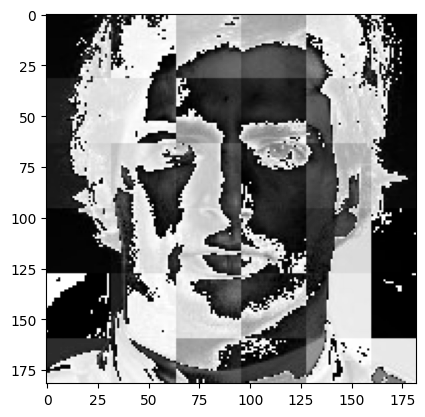

In [49]:
#testing the function

im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap ='gray')

In [50]:
#generating number for the driver names

class_dict = {}
count = 0

for driver_name in file_names_dict.keys():
    class_dict[driver_name] = count
    count = count + 1
    
class_dict

{'carlos_sainz': 0,
 'charles_leclerc': 1,
 'daniel_ricciardo': 2,
 'fernando_alonso': 3,
 'george_russell': 4,
 'lewis_hamilton': 5,
 'max_verstappen': 6,
 'sebastian_vettel': 7,
 'sergio_perez': 8,
 'valtteri_bottas': 9}

In [52]:
X = []
y = []


for driver_name, training_file in file_names_dict.items():
    for training_image in training_file:
        img = cv2.imread(training_image)
        
        if img is None:
            continue
        
        scaled_raw_img = cv2.resize(img, (32,32))
        
        img_har = w2d(img,'db1',5)
        scaled_img_har = cv2.resize(img_har, (32,32))
        
        combined_img = np.vstack((scaled_raw_img.reshape(32*32*3,1), scaled_img_har.reshape(32*32,1)))
        
        X.append(combined_img)
        y.append(class_dict[driver_name])

In [53]:
len(X[0])

4096

In [54]:
#converting x to float

X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(1414, 4096)

In [55]:
X[32]

array([19., 22., 25., ..., 20., 21., 20.])

In [56]:
#training the model

#importing modules

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [57]:
#splitting the data

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#creating sklearn pipeline

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='rbf', C = 10))])
pipe.fit(X_train,y_train)

pipe.score(X_test, y_test)

0.8163841807909604

In [58]:
#printing the classification report

print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      0.48      0.60        31
           1       0.65      0.92      0.77        53
           2       0.77      0.80      0.79        51
           3       0.90      0.90      0.90        29
           4       0.78      0.93      0.85        42
           5       0.77      0.77      0.77        13
           6       0.97      0.74      0.84        39
           7       1.00      0.84      0.91        37
           8       0.87      0.84      0.85        31
           9       0.96      0.82      0.88        28

    accuracy                           0.82       354
   macro avg       0.85      0.80      0.82       354
weighted avg       0.84      0.82      0.82       354



In [59]:
#grid search cv

#importing modules

from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

In [63]:
model_params = {
    'svm' : {
        'model': svm.SVC(gamma='auto', probability=True),
        'params' : {
            'svc__C' : [1,10,100,1000],
            'svc__kernel' : ['rbf','linear']
        }
    },
    'random_forest' : {
        'model' : RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators' : [1,5,10]
        }
    },
    'logistic_regression' : {
        'model' : LogisticRegression(solver='liblinear', multi_class='auto'),
        'params' : {
            'logisticregression__C' : [1,5,10]
        }
    }
}

#running grid search cv

scores = []
best_estimator = {}

import pandas as pd

for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf = GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train,y_train)
    
    scores.append({
        'model' : algo,
        'best_score' : clf.best_score_,
        'best_params' : clf.best_params_
    })
    best_estimator[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.833962,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.683962,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.818868,{'logisticregression__C': 1}


In [45]:
scores

[{'model': 'svm',
  'best_score': 0.8339622641509434,
  'best_params': {'svc__C': 1, 'svc__kernel': 'linear'}},
 {'model': 'random_forest',
  'best_score': 0.6952830188679247,
  'best_params': {'randomforestclassifier__n_estimators': 10}},
 {'model': 'logistic_regression',
  'best_score': 0.8188679245283019,
  'best_params': {'logisticregression__C': 1}}]

In [46]:
best_estimator

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [47]:
best_estimator['svm'].score(X_test,y_test)

0.827683615819209

In [48]:
best_estimator['random_forest'].score(X_test,y_test)

0.7457627118644068

In [49]:
best_estimator['logistic_regression'].score(X_test,y_test)

0.8163841807909604

In [50]:
#store svm

best_clf = best_estimator['svm']

In [51]:
#confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[15,  1,  8,  3,  0,  1,  0,  0,  2,  1],
       [ 0, 47,  0,  0,  3,  0,  1,  0,  1,  1],
       [ 2,  2, 45,  0,  1,  0,  0,  0,  1,  0],
       [ 0,  0,  1, 27,  0,  1,  0,  0,  0,  0],
       [ 1,  2,  1,  0, 38,  0,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  1, 10,  0,  0,  1,  0],
       [ 1,  3,  1,  1,  1,  0, 29,  0,  1,  2],
       [ 1,  4,  0,  0,  0,  1,  0, 30,  0,  1],
       [ 1,  3,  0,  0,  0,  0,  0,  0, 26,  1],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  1, 26]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

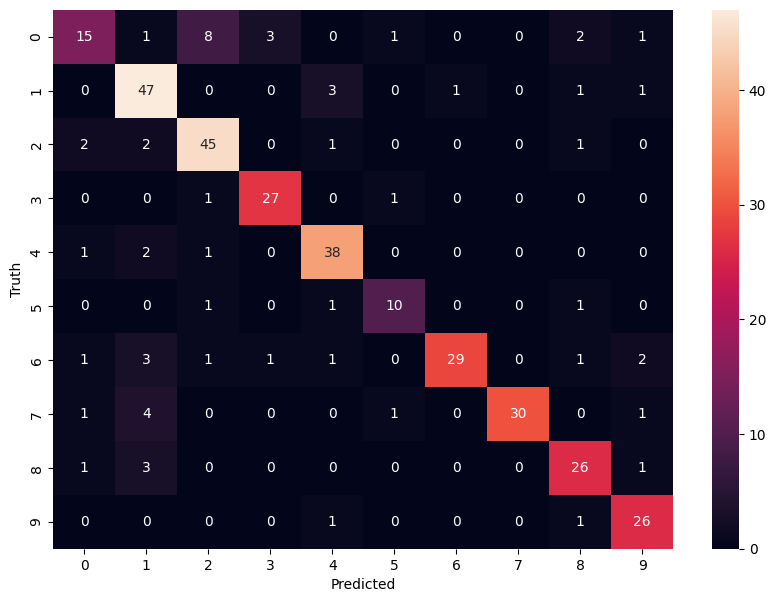

In [52]:
import seaborn as sns

plt.figure(figsize= (10,7))
sns.heatmap(cm, annot=True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [53]:
class_dict

{'carlos_sainz': 0,
 'charles_leclerc': 1,
 'daniel_ricciardo': 2,
 'fernando_alonso': 3,
 'george_russell': 4,
 'lewis_hamilton': 5,
 'max_verstappen': 6,
 'sebastian_vettel': 7,
 'sergio_perez': 8,
 'valtteri_bottas': 9}

In [55]:
#saving model

import joblib

#exporting as pickle file

joblib.dump(best_clf,'saved_model.pkl')

['saved_model.pkl']

In [56]:
#saving the dictionary of the class

import json

with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))

test1 = cv2.imread("C:\\Users\\saudq\\OneDrive\\Desktop\\vb.jpg")
print(test1.shape)
plt.imshow(test1)

test2 = cv2.cvtColor(test1, cv2.COLOR_BGR2GRAY)
print(test2.shape)
plt.imshow(test2)

test = cv2.resize(test2, (4096,1152))
print(test.shape)

pred = best_clf.predict(test)

ans = np.bincount(pred).argmax()

def get_key(val):
    for key, value in class_dict.items():
        if val == value:
            return key
 
    return "key doesn't exist"

final = get_key(ans)

print(final)

#final = [list(class_dict.values()).index(ans)]
#print(final)
#for i in pred:
#print(i,end=" ")

In [ ]:
class_dict